start from here ------>


In [25]:
import pandas as pd
from sklearn import linear_model
import numpy as np

# file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv('fp.csv')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dataset = pd.read_csv("fp.csv")

In [28]:
dataset.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [29]:
x = dataset[['Effort', 'Transactions', 'Entities','TeamExp','ManagerExp']]
y = dataset['Length']

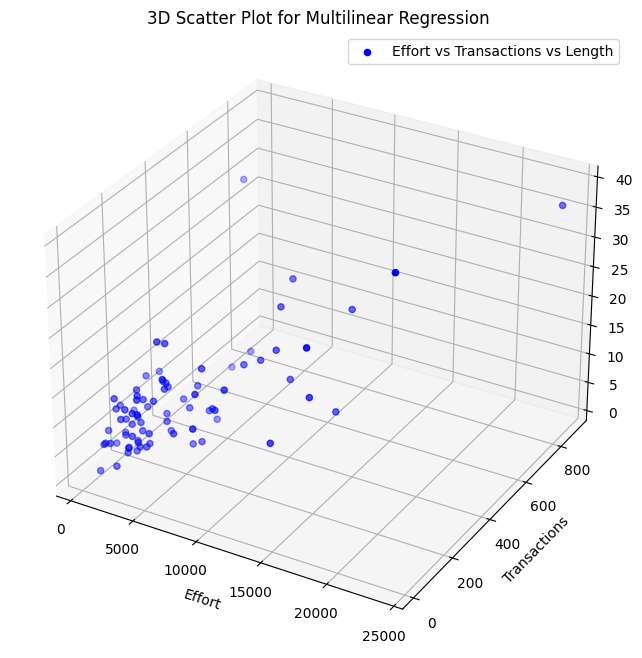

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for three features
ax.scatter(x['Effort'], x['Transactions'], y, c='b', marker='o', label='Effort vs Transactions vs Length')

# Set labels for the axes
ax.set_xlabel('Effort')
ax.set_ylabel('Transactions')
ax.set_zlabel('Length')

# Set a title for the plot
ax.set_title('3D Scatter Plot for Multilinear Regression')

# Show the plot
plt.legend(loc='upper right')
plt.show()


In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# X is your feature matrix (e.g., X = dataset[['Effort', 'Transactions', 'Entities', 'TeamExp', 'ManagerExp']])
# y is your target variable (e.g., y = dataset['Length'])

# The "test_size" parameter determines the proportion of data to include in the test set (e.g., 20% in this example).
# The "random_state" parameter ensures reproducibility by fixing the random seed. You can change it to any integer.


In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

In [34]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  1.9558803046371214
Coefficients:


[('Effort', 0.0005980517155249156),
 ('Transactions', 0.025359450775455553),
 ('Entities', 0.018325621819983443),
 ('TeamExp', -1.0138460984007864),
 ('ManagerExp', 0.992202538789138)]

In [35]:
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 7.57472882 15.36088018 17.52972094  6.73234745 12.87272165 12.26342911
  7.37423962  9.48076954  8.514025    5.45529741  9.78349089 12.35212302
  6.30956456 19.60153914  7.11487615 22.33908821 11.03545956  5.40664962
 19.01611243 17.01397782  7.00604421 12.78449611  7.73383126 15.16721871
  6.39517112  7.23360079  5.8469896  11.07816427  5.01957504 17.02103523
  7.3406936  43.07161238 10.93640583  8.95351336  6.78519052  2.48118372
 22.25448082  7.18073986 11.85118748 10.60431788  9.64601405]


In [36]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
30,6,7.574729
0,12,15.360880
22,5,17.529721
31,9,6.732347
18,14,12.872722


In [39]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 54.32
Mean Absolute Error: 4.02959189475428
Mean Square Error: 24.379148819831833
Root Mean Square Error: 4.9375245639725005


Let's try support vector algorithm


API intigration

In [41]:
!pip install flask
from flask import Flask, jsonify

app = Flask(__name__)

# Define a sample data dictionary
sample_data = {
    "name": "John Doe",
    "email": "john.doe@example.com",
    "age": 30
}

@app.route('/get_data', methods=['GET'])
def get_data():
    return jsonify(sample_data)

if __name__ == '__main__':
    app.run(debug=True)


ERROR: Operation cancelled by user
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [44]:
# @title Default title text
import requests

url = "http://127.0.0.1:5000/get_data"
response = requests.get(url)

print(response.json())


ConnectionError: ignored